In [243]:
# Helper packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# import plotnine
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

import seaborn as sns
# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import sklearn.metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE  #try downsampling 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# deep learning functionality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras import layers


In [256]:
# read the dataset
df = pd.read_csv("..\data\star_classification.csv")

# encode values for class column
df.replace({'class': {'GALAXY': 0, 'STAR': 1, 'QSO':2}}, inplace=True)



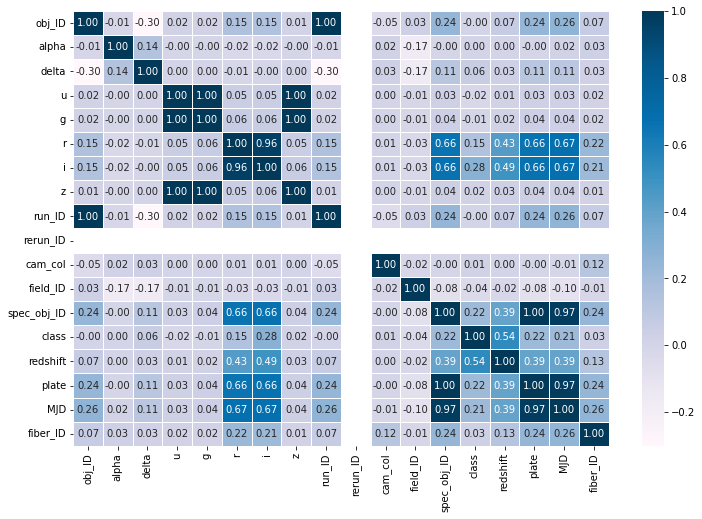

In [265]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [266]:
df.corr()["class"].sort_values()

field_ID      -0.038044
u             -0.017701
g             -0.005915
run_ID        -0.000049
obj_ID        -0.000047
alpha          0.004552
cam_col        0.014476
z              0.017352
fiber_ID       0.032053
delta          0.056643
r              0.150691
MJD            0.207262
spec_obj_ID    0.215722
plate          0.215722
i              0.284396
redshift       0.536822
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [261]:
from dis import dis

cleaned = df.drop(['obj_ID','run_ID','rerun_ID',"alpha"], axis = 1)

cleaned=cleaned.drop(79543)
# make the X and y varialbes
X = cleaned.drop('class', axis=1)
y = cleaned['class']
display(cleaned)


sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
cleaned.var()

,alpha,delta,u,g,r,i,z,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,131,7.601080e+18,0,0.455040,6751,56368,470


alpha          9.312754e+03
delta          3.859106e+02
u              5.067309e+00
g              4.150934e+00
r              3.440146e+00
i              3.090214e+00
z              3.118692e+00
cam_col        2.518293e+00
field_ID       2.220329e+04
spec_obj_ID    1.104915e+37
class          6.201753e-01
redshift       5.339351e-01
plate          8.716149e+06
MJD            3.270644e+06
fiber_ID       7.425530e+04
dtype: float64

In [ ]:
sns.displot(df["run_ID"]);


In [ ]:
sns.displot(df["field_ID"]);


In [ ]:
sns.displot(df["MJD"]);

In [ ]:
cleaned[cleaned["redshift"]>5]

In [ ]:
sns.displot(cleaned["alpha"]);

In [ ]:
sns.displot(cleaned["delta"]);

In [ ]:
sns.displot(x=cleaned["u"]);

In [ ]:
cleaned

In [ ]:
sns.displot(x=cleaned["g"]);

In [ ]:
sns.displot(cleaned["r"]);

In [ ]:
sns.displot(cleaned["i"]);

In [ ]:
sns.displot(cleaned["z"]);

In [ ]:
sns.countplot(x=cleaned["cam_col"]);

In [ ]:
sns.countplot(x=cleaned["class"]);

In [ ]:
sns.displot(cleaned["redshift"]);

In [ ]:
sns.displot(cleaned["plate"]);

# pre-processing

In [268]:
# Normalizing approach
yj = PowerTransformer(method="yeo-johnson")
scaler = StandardScaler()
# nzv_encoder = VarianceThreshold(threshold=0.1)
# pca = PCA(n_components=7)

# Normalize all numeric features
preprocessor = ColumnTransformer([("norm", yj, selector(dtype_include="number")),
                ("std_encode", scaler, selector(dtype_include="number")),
                # ("nzv_encoder", nzv_encoder, selector(dtype_include="number")),
                # ("pca_encode", pca, selector(dtype_include="number"))
                ])

# Random Forest Classifier

In [252]:

#best training data for Random Forest Classifier
tree_X_train= X_train[['delta', 'u', 'g', 'i',"spec_obj_ID", 'redshift', 'plate']]
tree_X_test= X_test[['delta', 'u', 'g', 'i',"spec_obj_ID", 'redshift', 'plate']]


#creating the Random Forest Classifier model with the pre processing steps
r_forest = RandomForestClassifier()
r_forest_pipeline = Pipeline(steps=[
  ("norm", yj),
  ("std_encode",scaler),
  ("r_forest", r_forest),
])


# training the model
r_forest_pipeline.fit(tree_X_train,y_train)
predicted = r_forest_pipeline.predict(tree_X_test)
score = r_forest_pipeline.score(tree_X_test,y_test)
r_forest_pipeline_score = np.mean(score)
r_forest_pipeline_score

# 0.983

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply


0.9824676174277116

In [ ]:
# define loss function
scoring = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# # fit model with 10-fold CV
results = cross_val_score(r_forest_pipeline, X_test, y_test, cv=kfold, scoring=scoring)
results.mean()


In [ ]:
#feature selection
tsfs=SFS(r_forest_pipeline,k_features=14,scoring=scoring,cv=kfold)
tsfs.fit(X,y)
tsfs.subsets_


#best output
#  7: {'feature_idx': (2, 3, 4, 6, 12, 13, 14),
#   'cv_scores': array([0.98320576, 0.98357025, 0.9836824 , 0.98457958, 0.98340202]),
#   'avg_score': 0.9836880029158606,
#   'feature_names': ('delta','u','g','i','spec_obj_ID','redshift','plate')},

In [ ]:
# Create grid of hyperparameter values

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

hyper_grid = {'r_forest__n_estimators': n_estimators,
               'r_forest__max_depth': max_depth,
               'r_forest__min_samples_split': min_samples_split,
               'r_forest__min_samples_leaf': min_samples_leaf,
               'r_forest__bootstrap': bootstrap}


grid_search = GridSearchCV(r_forest_pipeline, hyper_grid, cv=kfold, scoring=scoring)
results = grid_search.fit(X_train[["g","i","redshift"]], y_train)

# SVM

In [ ]:

#best training data for Random Forest Classifier
#??


#creating SVM model
svm_clf = svm.SVC(kernel='rbf', C=2, random_state=0)
model_pipeline = Pipeline(steps=[
  ("norm", yj),
  ("std_encode",scaler),
  ("knn", svm_clf),
])


#training SVM model
# model_pipeline.fit(X_train,y_train)
# predicted = model_pipeline.predict(X_test)
# score = model_pipeline.score(X_test,y_test)
# model_pipeline_score = np.mean(score)
# model_pipeline_score
#0.977

0.973589278705071

In [ ]:
# define loss function
scoring = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# # fit model with 10-fold CV
# results = cross_val_score(model_pipeline, X_test, y_test, cv=kfold, scoring=scoring)
# results.mean()

#feature selection
svmsfs=SFS(model_pipeline,
    k_features=17,
    scoring=scoring,
    cv=kfold)
svmsfs.fit(X,y)
svmsfs.subsets_

# Logistic Regression

In [269]:
#best training data for Logistic Regression
log_X_train=X_train[["delta","u","g","r","cam_col","field_ID","spec_obj_ID","redshift","plate","MJD","fiber_ID"]]
log_X_test=X_test[["delta","u","g","r","cam_col","field_ID","spec_obj_ID","redshift","plate","MJD","fiber_ID"]]

#creating Logistic Regression model
log_reg=LogisticRegression(max_iter=1000,C=4714.85,penalty="l2")
log_reg_pipeline = Pipeline(steps=[
  ("norm", yj),
  ("std_encode",scaler),
  ("log_reg", log_reg),
])

#training Logistic Regression model
log_reg_pipeline.fit(X_train,y_train)
predicted = log_reg_pipeline.predict(X_test)
score = log_reg_pipeline.score(X_test,y_test)
log_reg_pipeline = np.mean(score)
log_reg_pipeline

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply


0.9692902936393712

In [262]:
# define scoring function
scoring = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

#  fit model with 10-fold CV
results = cross_val_score(log_reg_pipeline, X_test, y_test, cv=kfold, scoring=scoring)
results.mean()



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: Runtim

{1: {'feature_idx': (10,),
  'cv_scores': array([0.93876693, 0.94067345, 0.93848656, 0.94286035, 0.94117812]),
  'avg_score': 0.9403930804385006,
  'feature_names': ('redshift',)},
 2: {'feature_idx': (3, 10),
  'cv_scores': array([0.96840216, 0.96871057, 0.9678975 , 0.96966383, 0.96890683]),
  'avg_score': 0.9687161802226146,
  'feature_names': ('g', 'redshift')},
 3: {'feature_idx': (1, 3, 10),
  'cv_scores': array([0.96798161, 0.96915917, 0.96829002, 0.97030869, 0.96904702]),
  'avg_score': 0.968957299464491,
  'feature_names': ('delta', 'g', 'redshift')},
 4: {'feature_idx': (0, 1, 3, 10),
  'cv_scores': array([0.96837413, 0.96915917, 0.96848628, 0.97050495, 0.9691872 ]),
  'avg_score': 0.9691423444640705,
  'feature_names': ('alpha', 'delta', 'g', 'redshift')},
 5: {'feature_idx': (0, 1, 3, 10, 13),
  'cv_scores': array([0.96829002, 0.9691872 , 0.96868254, 0.97047691, 0.96913113]),
  'avg_score': 0.9691535593125298,
  'feature_names': ('alpha', 'delta', 'g', 'redshift', 'fiber_ID'

In [ ]:
# Create grid of hyperparameter values
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

hyper_grid = {'log_reg__C': C,
        'log_reg__penalty':penalty,
        }

# Tune a Logistic Regression model using grid search
grid_search = GridSearchCV(model_pipeline, hyper_grid, cv=kfold, scoring=scoring)
results = grid_search.fit(X_train, y_train)

results.best_params_
#best output
#C=4714.85
#penalty="l2"

In [ ]:
#feature selection
sfs=SFS(log_reg_pipeline,
    k_features=14,
    scoring=scoring,
    cv=kfold)
    
sfs.fit(X,y)
sfs.subsets_


#best output
#  13: {'feature_idx': ( 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13),
#   'cv_scores': array([0.96859842, 0.96991617, 0.96851431, 0.97128999, 0.9696358 ]),
#   'avg_score': 0.9695909384024448,
#   'feature_names': ('delta','u','g','r','i','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID')}}

# K-Nearest Neighbors


In [271]:
#best training data for K-Nearest Neighbors
log_X_train=X_train[['g', 'r', 'i', 'z', 'redshift', 'plate']]
log_X_test=X_test[['g', 'r', 'i', 'z', 'redshift', 'plate']]


#creating the Knn model
knn=KNeighborsClassifier(n_neighbors=3)
knn_pipeline = Pipeline(steps=[
  ("norm", yj),
  ("std_encode",scaler),
  ("knn", knn),
])

#training the KNN model
knn_pipeline.fit(X_train,y_train)
predicted = knn_pipeline.predict(X_test)
score = knn_pipeline.score(X_test,y_test)
knn_pipeline_score = np.mean(score)
knn_pipeline_score


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply


0.9580381675108877

In [ ]:
# define loss function
scoring = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# # fit model with 10-fold CV
results = cross_val_score(model_pipeline, X_test, y_test, cv=kfold, scoring=scoring)
results.mean()



In [ ]:
# hyper parameters for CV
hyper_params = {
    'n_neighbors': range(1, 10+1)
}

# Tune `knn` using grid search
grid_search = GridSearchCV(knn_pipeline, hyper_params, cv=kfold, scoring='accuracy')
grid_results = grid_search.fit(log_X_train, y_train)

#best output
# 3

In [ ]:
#feature selection
sfs=SFS(knn_pipeline,
    k_features=13,
    scoring=scoring,
    cv=kfold)
    
sfs.fit(X,y)
sfs.subsets_

#best output
#  {'feature_idx': (4, 5, 6, 7, 13, 14),
#   'cv_scores': array([0.97300025, 0.97330866, 0.97364511, 0.975075  , 0.97473855]),
#   'avg_score': 0.9739535144531359,
#   'feature_names': ('g', 'r', 'i', 'z', 'redshift', 'plate')}, 

# deep learining

In [ ]:
from dis import dis

# cleaned = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)
cleaned = df.drop(['u','r','i','z','obj_ID','spec_obj_ID','MJD'], axis = 1)

# cleaned = df.drop(df.filter(regex='ID$').columns, axis=1)
# drop the date column
# cleaned = cleaned.drop(["MJD","plate","cam_col"], axis=1)
cleaned=cleaned.drop(79543)
# make the X and y varialbes
X = cleaned.drop('class', axis=1)
y = cleaned['class']
display(cleaned)


sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

from tensorflow.keras import utils
# y = utils.to_categorical(y)
# y_train = utils.to_categorical(y_train)
# y_test = utils.to_categorical(y_test)


In [ ]:

# define the keras model
model = Sequential()
model.add(Dense(units=64, input_dim=20, activation="tanh"))
model.add(Dense(units=64,  activation="tanh"))
model.add(Dense(units=32,  activation="tanh"))
model.add(Dense(units=3, activation='softmax'))

# compile the keras model
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer="rmsprop",
    metrics='accuracy'
)
# fit the model
# model.fit(X, y, epochs=20, validation_split=0.2)
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("model", model),
])
m1=model_pipeline.fit(X_train,y_train, model__epochs=20, model__validation_split=0.2,model__batch_size=32,)

In [ ]:
predicted=m1.predict(X_test)
y_classes = predicted.argmax(axis=-1)

# model_pipeline.transform(X_test)
print(classification_report(y_test, y_classes)) 

In [ ]:
# define loss function
loss = 'accuracy'

# create 10 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 10-fold CV
results = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring=loss)
results

In [ ]:
# hyper_grid = {'n_neighbors': range(2, 26)}
# grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
# results = grid_search.fit(X_train, y_train)

# k-means clustring | trash

In [ ]:
model = sklearn.cluster.KMeans(n_clusters=3,random_state=123)
model

In [ ]:
galaxy = cleaned[cleaned["class"]==0].drop("class",axis=1)
galaxy_centers = map(lambda a: a/galaxy.shape[0],galaxy.sum())
galaxy_centers= np.array(list(galaxy_centers))
galaxy_centers


STAR = cleaned[cleaned["class"]==1].drop("class",axis=1)
STAR_centers = map(lambda a: a/STAR.shape[0],STAR.sum())
STAR_centers= np.array(list(STAR_centers))
STAR_centers



QSO = cleaned[cleaned["class"]==2].drop("class",axis=1)
QSO_centers = map(lambda a: a/QSO.shape[0],QSO.sum())
QSO_centers= np.array(list(QSO_centers))
QSO_centers



In [ ]:
m1=model.fit([galaxy_centers,STAR_centers,QSO_centers])
m1.labels_

In [ ]:
pred= m1.predict(X_test)
print(classification_report(y_test, pred)) 